# Global Street Food Analysis

## Scenario
Karin is planning to launch an international food truck business. Her goal is to create a compact menu featuring four main dishes, each representing a different country. However, there are a few practical constraints:

* The food truck can only support two cooking methods, due to space and equipment limitations.
* To keep costs low and minimize food waste, Karin wants the selected dishes to share as many ingredients as possible.
* To increase customer reach, Karin wants to use vegetarian friendly dishes.

Finally, Karin would like an estimation of the final dishes sale price.

## Data Exploration

In [12]:
#File Path Configuration (Change as needed)
DATA_DIR = "/data"
FIGURES_DIR = "/figures"


#File Names
MAIN_DATA_FILE = DATA_DIR + "/global_street_food.csv"
CLEANED_DATA_FILE = DATA_DIR + "/cleaned_data.csv"
LONG_DATA_FILE = DATA_DIR + "/long_data.csv"

COOKING_METHODS_FIGURE = FIGURES_DIR + "/CookingMethods.png"
COUNTRIES_FIGURE = FIGURES_DIR + "/DishesByCountry.png"
INGREDIENTS_FIGURE = FIGURES_DIR + "/Ingredients.png"
VEGETARIAN_FIGURE = FIGURES_DIR + "/VegetarianPie.png"

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv(MAIN_DATA_FILE)

In [15]:
df

,Dish Name,Country,Region/City,Ingredients,Description,Cooking Method,Typical Price (USD),Vegetarian
0,Takoyaki,Japan,Osaka,"Octopus, Flour Batter, Bonito Flakes, Green On...","Crispy and hot, often served with sauces or ch...",Fried,3.28,No
1,Vada Pav,India,Mumbai,"Potato, Spices, Bread Bun, Chutney","Crispy and hot, often served with sauces or ch...",Fried,2.37,Yes
2,Funnel Cake,USA,Texas,"Batter, Sugar, Oil","Crispy and hot, often served with sauces or ch...",Fried,2.78,Yes
3,Kathi Roll,India,Kolkata,"Flatbread, Egg, Chicken, Onions, Chutney",Charred to perfection with a smoky flavor.,Grilled,1.89,No
4,Pad Thai,Thailand,Bangkok,"Rice Noodles, Tofu, Eggs, Peanuts, Bean Sprouts",Quickly tossed in a hot pan with bold flavors.,Stir-Fried,3.48,Yes
...,...,...,...,...,...,...,...,...
4495,Koshari,Egypt,Cairo,"Lentils, Rice, Pasta, Tomato Sauce, Onions",A hearty mix of grains topped with spicy tomat...,Boiled,2.80,Yes
4496,Koshari,Egypt,Cairo,"Lentils, Rice, Pasta, Tomato Sauce, Onions",A hearty mix of grains topped with spicy tomat...,Boiled,2.80,Yes
4497,Koshari,Egypt,Cairo,"Lentils, Rice, Pasta, Tomato Sauce, Onions",A hearty mix of grains topped with spicy tomat...,Boiled,2.80,Yes
4498,Koshari,Egypt,Cairo,"Lentils, Rice, Pasta, Tomato Sauce, Onions",A hearty mix of grains topped with spicy tomat...,Boiled,2.80,Yes


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dish Name            4500 non-null   object 
 1   Country              4500 non-null   object 
 2   Region/City          4500 non-null   object 
 3   Ingredients          4500 non-null   object 
 4   Description          4500 non-null   object 
 5   Cooking Method       4500 non-null   object 
 6   Typical Price (USD)  4500 non-null   float64
 7   Vegetarian           4500 non-null   object 
dtypes: float64(1), object(7)
memory usage: 281.4+ KB


In [17]:
df.nunique()

Dish Name               25
Country                 11
Region/City             25
Ingredients             26
Description             15
Cooking Method           9
Typical Price (USD)    481
Vegetarian               2
dtype: int64

In [18]:
#Checking for NaN values
df.isnull().values.any()

False

In [19]:
#Checking the types of values in each column
for col in df.columns:
    print(df[col].apply(type).value_counts())

Dish Name
<class 'str'>    4500
Name: count, dtype: int64
Country
<class 'str'>    4500
Name: count, dtype: int64
Region/City
<class 'str'>    4500
Name: count, dtype: int64
Ingredients
<class 'str'>    4500
Name: count, dtype: int64
Description
<class 'str'>    4500
Name: count, dtype: int64
Cooking Method
<class 'str'>    4500
Name: count, dtype: int64
Typical Price (USD)
<class 'float'>    4500
Name: count, dtype: int64
Vegetarian
<class 'str'>    4500
Name: count, dtype: int64


In [20]:
df['Cooking Method'].unique()

array(['Fried', 'Grilled', 'Stir-Fried', 'Assembled', 'Baked',
       'Boiled/Grilled', 'Pan-Fried', 'Stewed', 'Boiled'], dtype=object)

In [21]:
#Checking for duplicate rows.
df.duplicated().sum()

1288

## Data Cleaning

In [22]:
#No null values
#1288 duplicates
#Data types seem fine
#A cursory glance shows that there are issues with some data entries being duplicated from a previous entry e.g 
#Dish Name 	|Description
#Takoyaki 	|Crispy and hot, often served with sauces or ch...
#Funnel Cake |Crispy and hot, often served with sauces or ch...

In [23]:
#Removing all exact duplicates and confirming by checking duplicates.
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [24]:
#There are a lot of duplicates with slightly different data (e.g. an extra/missing ingredient), so I just use the first instance.
short_df = df[~df.duplicated(['Dish Name'])]

short_df.reset_index(drop=True, inplace=True)

short_df

,Dish Name,Country,Region/City,Ingredients,Description,Cooking Method,Typical Price (USD),Vegetarian
0,Takoyaki,Japan,Osaka,"Octopus, Flour Batter, Bonito Flakes, Green On...","Crispy and hot, often served with sauces or ch...",Fried,3.28,No
1,Vada Pav,India,Mumbai,"Potato, Spices, Bread Bun, Chutney","Crispy and hot, often served with sauces or ch...",Fried,2.37,Yes
2,Funnel Cake,USA,Texas,"Batter, Sugar, Oil","Crispy and hot, often served with sauces or ch...",Fried,2.78,Yes
3,Kathi Roll,India,Kolkata,"Flatbread, Egg, Chicken, Onions, Chutney",Charred to perfection with a smoky flavor.,Grilled,1.89,No
4,Pad Thai,Thailand,Bangkok,"Rice Noodles, Tofu, Eggs, Peanuts, Bean Sprouts",Quickly tossed in a hot pan with bold flavors.,Stir-Fried,3.48,Yes
5,Pani Puri,India,Delhi,"Semolina, Tamarind, Chickpeas, Spices",Put together fresh with a mix of flavors and t...,Assembled,0.47,Yes
6,Taiyaki,Japan,Kyoto,"Flour, Red Bean Paste",Golden brown and fluffy with a soft interior.,Baked,2.00,Yes
7,Gözleme,Turkey,Ankara,"Dough, Spinach, Cheese",Charred to perfection with a smoky flavor.,Grilled,4.69,Yes
8,Kokoreç,Turkey,Izmir,"Lamb Intestines, Spices, Bread",Charred to perfection with a smoky flavor.,Grilled,4.26,No
9,Roti Sai Mai,Thailand,Ayutthaya,"Roti, Cotton Candy",Put together fresh with a mix of flavors and t...,Assembled,3.68,Yes


In [25]:
#Dropping "Description" as we wont be using it.
short_df = short_df.drop(columns=['Description'])

In [26]:
#Cleaning any "Cooking Methods" that have two methods listed. e.g. Elotes Boiled/Grilled.
#I've decided to just use the first method but that might have had its own issues in a larger and more complex data set.

short_df['Primary Cooking Method'] = short_df['Cooking Method'].str.split('/').str[0]
short_df = short_df.drop(columns=['Cooking Method'])
short_df

,Dish Name,Country,Region/City,Ingredients,Typical Price (USD),Vegetarian,Primary Cooking Method
0,Takoyaki,Japan,Osaka,"Octopus, Flour Batter, Bonito Flakes, Green On...",3.28,No,Fried
1,Vada Pav,India,Mumbai,"Potato, Spices, Bread Bun, Chutney",2.37,Yes,Fried
2,Funnel Cake,USA,Texas,"Batter, Sugar, Oil",2.78,Yes,Fried
3,Kathi Roll,India,Kolkata,"Flatbread, Egg, Chicken, Onions, Chutney",1.89,No,Grilled
4,Pad Thai,Thailand,Bangkok,"Rice Noodles, Tofu, Eggs, Peanuts, Bean Sprouts",3.48,Yes,Stir-Fried
5,Pani Puri,India,Delhi,"Semolina, Tamarind, Chickpeas, Spices",0.47,Yes,Assembled
6,Taiyaki,Japan,Kyoto,"Flour, Red Bean Paste",2.00,Yes,Baked
7,Gözleme,Turkey,Ankara,"Dough, Spinach, Cheese",4.69,Yes,Grilled
8,Kokoreç,Turkey,Izmir,"Lamb Intestines, Spices, Bread",4.26,No,Grilled
9,Roti Sai Mai,Thailand,Ayutthaya,"Roti, Cotton Candy",3.68,Yes,Assembled


In [27]:
#Making a long data frame of all the ingredients to find recipe/ingredient crossover.
df_expanded = short_df.copy()

#Removing the price data as we should always be getting that from short_df instead
df_expanded.drop(['Typical Price (USD)'], axis=1, inplace=True)

#Splitting the Ingredients column
df_expanded['Ingredients'] = df_expanded['Ingredients'].str.split(',')

#Stripping out white spaces
df_expanded['Ingredients'] = df_expanded['Ingredients'].apply(lambda lst: [i.strip() for i in lst])

long_df = df_expanded.explode('Ingredients')

#List of generic/irrelevant ingredients to exclude
ingredients_to_exclude = ['spices', 'salt', 'water', 'oil', 'pepper']

#Remove unwanted ingredients
long_df = long_df[~long_df['Ingredients'].str.lower().isin([i.lower() for i in ingredients_to_exclude])]

#Reset index
long_df.reset_index(drop=True, inplace=True)

long_df

,Dish Name,Country,Region/City,Ingredients,Vegetarian,Primary Cooking Method
0,Takoyaki,Japan,Osaka,Octopus,No,Fried
1,Takoyaki,Japan,Osaka,Flour Batter,No,Fried
2,Takoyaki,Japan,Osaka,Bonito Flakes,No,Fried
3,Takoyaki,Japan,Osaka,Green Onions,No,Fried
4,Vada Pav,India,Mumbai,Potato,Yes,Fried
...,...,...,...,...,...,...
80,Koshari,Egypt,Cairo,Lentils,Yes,Boiled
81,Koshari,Egypt,Cairo,Rice,Yes,Boiled
82,Koshari,Egypt,Cairo,Pasta,Yes,Boiled
83,Koshari,Egypt,Cairo,Tomato Sauce,Yes,Boiled


In [28]:
#Saving the short (cleaned) and long data frames to csv files
short_df.to_csv(CLEANED_DATA_FILE)
long_df.to_csv(LONG_DATA_FILE)

In [29]:
#Finding out perfect dishes

#Filter only Vegetarian
veg_df = long_df[long_df['Vegetarian'] == 'Yes']

#Group by Dish name and Ingredient to sort
dish_ingredients = veg_df.groupby('Dish Name')['Ingredients'].apply(set)

#Group by Dish name and Cooking method
dish_methods = veg_df.groupby('Dish Name')['Primary Cooking Method'].first()

#Group by Dish name and Country
dish_countries = veg_df.groupby('Dish Name')['Country'].first()

#Not sure if there are other ways to do this but I am using itertools
from itertools import combinations

#Stores the current best combination
best_combo = None
max_shared = -1
dish_total = 3
cooking_methods = 2

for combo in combinations(dish_ingredients.index, dish_total):
    #Gets method sets for this combo
    methods = {dish_methods[dish] for dish in combo}

    #Get countries set for this combo
    countries = {dish_countries[dish] for dish in combo}
    
    #Ensures that the methods used does not exceed our desired amount
    if len(methods) <= cooking_methods and len(countries) == dish_total:
        #Get ingredient sets for this combo
        ing_sets = [dish_ingredients[dish] for dish in combo]
        shared_ingredients = set.intersection(*ing_sets)

        #Updates the best_combo if this combo is better
        if len(shared_ingredients) > max_shared:
            max_shared = len(shared_ingredients)
            best_combo = combo


print("Best combination:", best_combo)
print("Shared ingredients:", set.intersection(*[dish_ingredients[d] for d in best_combo]))
print("Cooking methods:", [dish_methods[d] for d in best_combo])

Best combination: ('Elote', 'Falafel', 'Funnel Cake')
Shared ingredients: set()
Cooking methods: ['Boiled', 'Fried', 'Fried']


In [30]:
#Getting the average prices to use in our presentation
chosen_dishes_df = df[df['Dish Name'].isin(best_combo)]
avg_prices = chosen_dishes_df.groupby('Dish Name')['Typical Price (USD)'].mean().sort_values()

avg_prices

Dish Name
Elote          2.622542
Funnel Cake    2.666059
Falafel        3.000000
Name: Typical Price (USD), dtype: float64

In [31]:
#Getting the total amount of unique ingredients
print(long_df['Ingredients'].value_counts())

Ingredients
Cheese          4
Onions          4
Pork            4
Flour           3
Flatbread       2
               ..
Noodles         1
Flour Batter    1
Tortilla        1
Mushrooms       1
Tomato Sauce    1
Name: count, Length: 66, dtype: int64


## Visuals

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [33]:
#Importing the cleaned and long dataframes so you can start from here.
short_df = pd.read_csv(CLEANED_DATA_FILE)
long_df = pd.read_csv(LONG_DATA_FILE)

In [34]:
#Using a colourblind safe pallete from seaborn
colours = sns.color_palette("colorblind", 6)

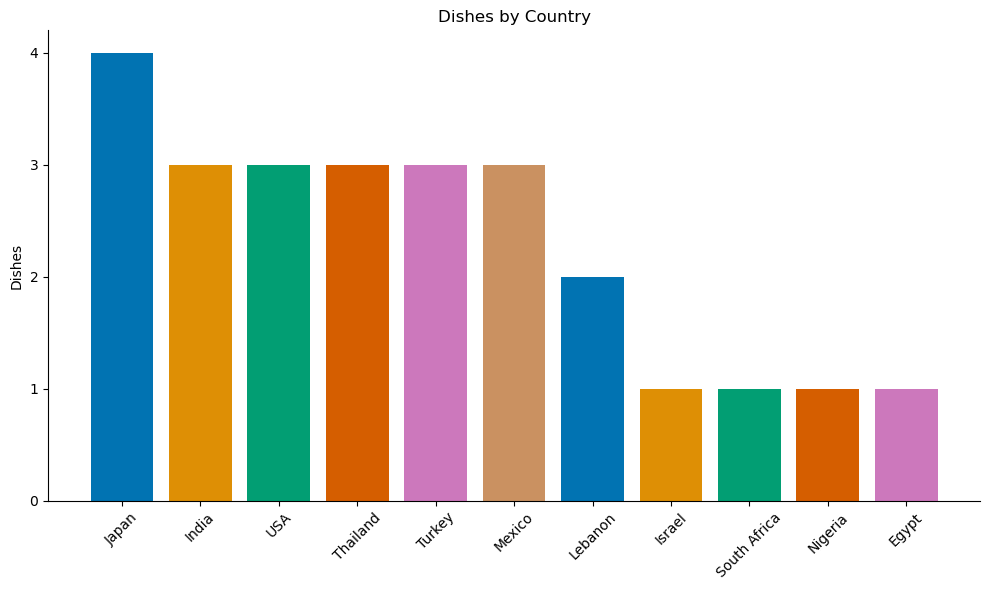

In [35]:
#Creates a visualisation for total dishes
top_countries_count = short_df['Country'].value_counts()

#Using a colourblind safe pallete from seaborn
colours = sns.color_palette("colorblind", 6)

#Explicitly creates a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


plt.bar(x=top_countries_count.index.tolist(), height=top_countries_count.values, color=colours)
plt.title('Dishes by Country')
plt.ylabel('Dishes')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 5, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig(COUNTRIES_FIGURE, bbox_inches='tight')
plt.show()

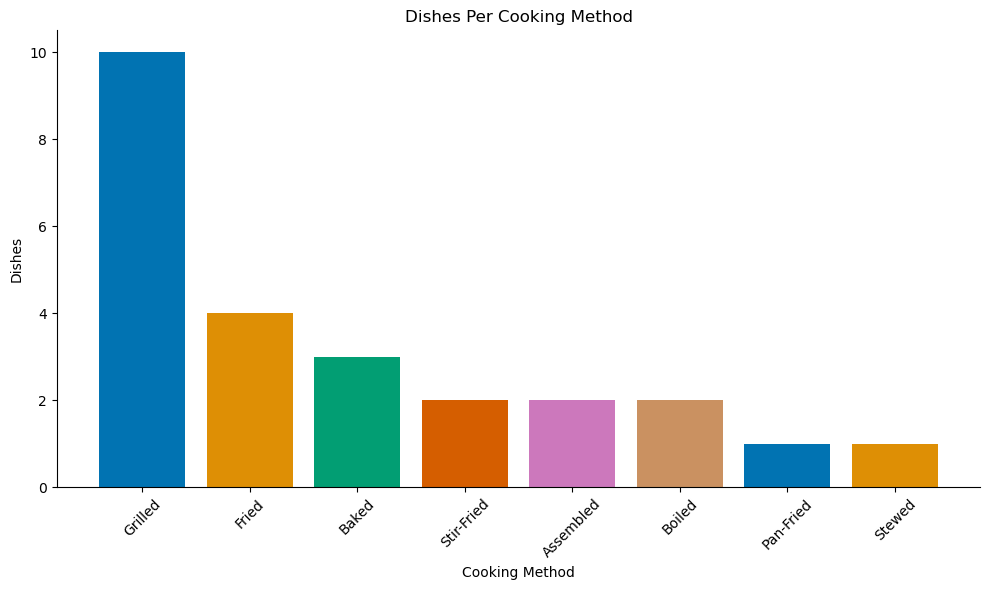

In [36]:
#Creates a visualisation for cooking methods
cooking_method_count = short_df['Primary Cooking Method'].value_counts()

#Using a colourblind safe pallete from seaborn
colours = sns.color_palette("colorblind", 6)

#Explicitly creates a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

plt.bar(cooking_method_count.index, cooking_method_count.values, color=colours)
plt.title('Dishes Per Cooking Method')
plt.xlabel('Cooking Method')
plt.ylabel('Dishes')
plt.xticks(rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig(COOKING_METHODS_FIGURE, bbox_inches='tight')
plt.show()

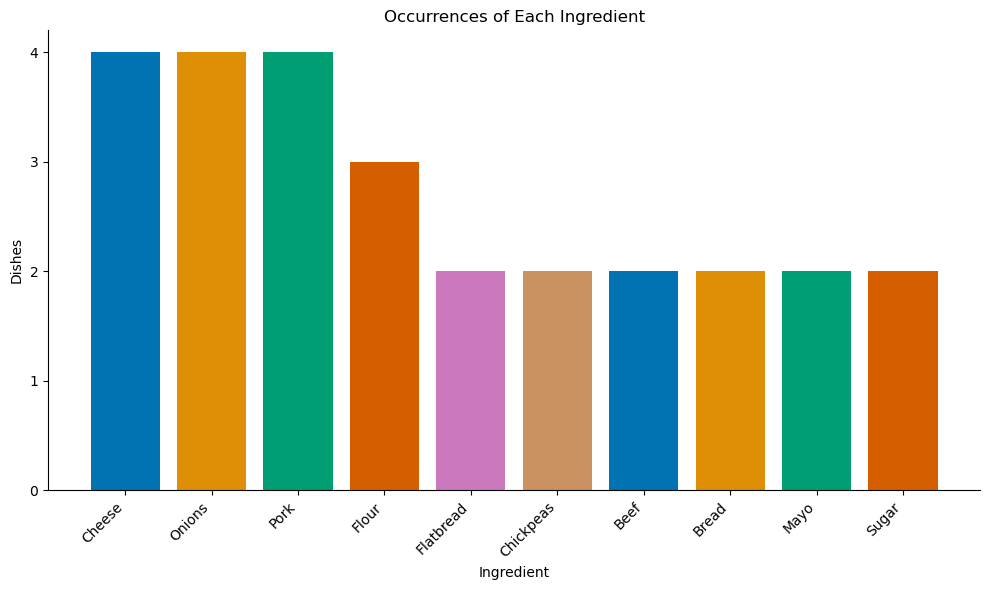

In [37]:
#Creates a visualisation for the ingredients
ingredient_counts = long_df['Ingredients'].value_counts().head(10)


#Using a colourblind safe pallete from seaborn
colours = sns.color_palette("colorblind", 6)

#Explicitly creates a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

plt.bar(ingredient_counts.index, ingredient_counts.values, color=colours)
plt.xticks(rotation=45, ha='right')
plt.title('Occurrences of Each Ingredient')
plt.xlabel('Ingredient')
plt.yticks(np.arange(0, 5, 1))
plt.ylabel('Dishes')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig(INGREDIENTS_FIGURE, bbox_inches='tight')
plt.show()

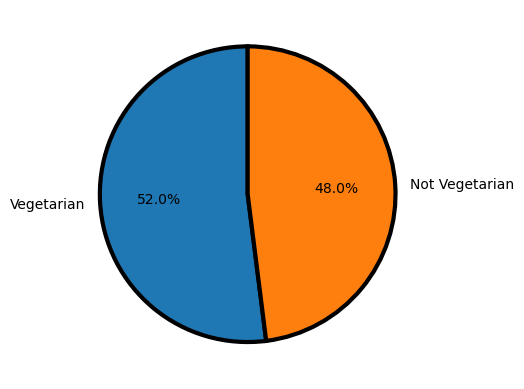

In [38]:
labels = ['Vegetarian', 'Not Vegetarian']

#Plot pie chart with borders
fig, ax = plt.subplots()
ax.pie(
    short_df['Vegetarian'].value_counts(),
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 3}  #adds black border of 3 linewidth
)
plt.savefig(VEGETARIAN_FIGURE, bbox_inches='tight')
plt.show()